In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

# import numpy as np # linear algebra
# import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# # Input data files are available in the read-only "../input/" directory
# # For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# import os
# for dirname, _, filenames in os.walk('/kaggle/input'):
#     for filename in filenames:
#         print(os.path.join(dirname, filename))

# # You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# # You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Загрузка датасета

In [3]:
import numpy as np
import pandas as pd

In [4]:
BASE_URL = '/content/drive/MyDrive/titanic/'

In [5]:
df = pd.read_csv(f'{BASE_URL}Titanic.csv')

Создание копии DataFrame

In [6]:
df_initial = df.copy(deep=True)

In [7]:
df_initial

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [8]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Обработка DataFrame

In [9]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


In [10]:
df.shape

(891, 12)

In [11]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [13]:
categorical_cols = df.select_dtypes(include=['object']).columns
label_encoders = {}

In [14]:
categorical_cols

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [17]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2
888,889,0,3,413,0,NaN,1,2,675,23.4500,147,2
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [19]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


In [21]:
df['Age'].fillna(df['Age'].median(),inplace=True)

<ipython-input-21-e0c0624688bb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)


In [22]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
dtypes: float64(2), int64(10)
memory usage: 83.7 KB


# Аналитика

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Распределение выживших и погибших

In [25]:
# Получаем количество выживших и погибших
total_survived = df['Survived'].value_counts()
total_survived

,count
Survived,
0,549
1,342


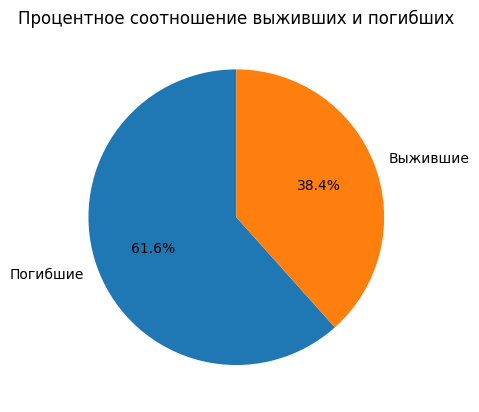

In [26]:
# Строим круговую диаграмму
total_survived.plot(
    kind='pie', # Круговая диаграмма
    startangle=90, # Поворот диаграммы для простоты восприятия
    autopct='%1.1f%%', # Отображение в процентах с одним знаком после точки
    labels=['Погибшие', 'Выжившие']
)
plt.title('Процентное соотношение выживших и погибших')
plt.ylabel('')
plt.show()

Видно, что выживших почти в 2 раза меньше чем погибших

### Распределение мужчин и женщин на корабле

In [27]:
# Получаем количество мужчин и женщин на борту
male_female = df_initial['Sex'].value_counts()
male_female

,count
Sex,
male,577
female,314


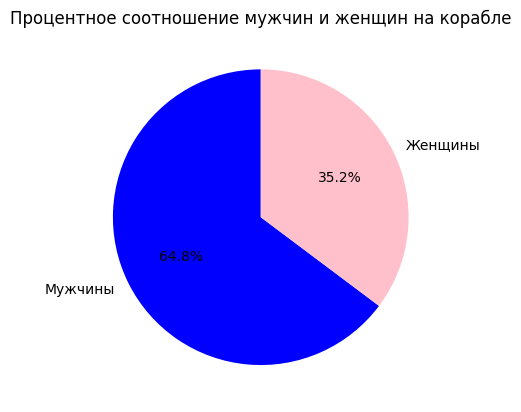

In [28]:
male_female.plot(
    kind='pie',
    colors=['blue', 'pink'],
    startangle=90,
    autopct='%1.1f%%',
    labels=['Мужчины', 'Женщины']
)
plt.title('Процентное соотношение мужчин и женщин на корабле')
plt.ylabel('')
plt.show()

Из диаграммы видно, что на корабле мужчин было почти в 2 раза больше, чем женщин

### Количество выживших и умерших в зависимости от пола и класса

In [ ]:
# Группируем данные по полу и классу и считаем количество выживших и погибших
surv = df_initial.groupby(['Sex', 'Pclass'])['Survived'].value_counts()
surv_un = surv.unstack() # Преобразуем полученные данные в более удобный вид
surv_un

Survived         0   1
Sex    Pclass         
female 1         3  91
       2         6  70
       3        72  72
male   1        77  45
       2        91  17
       3       300  47

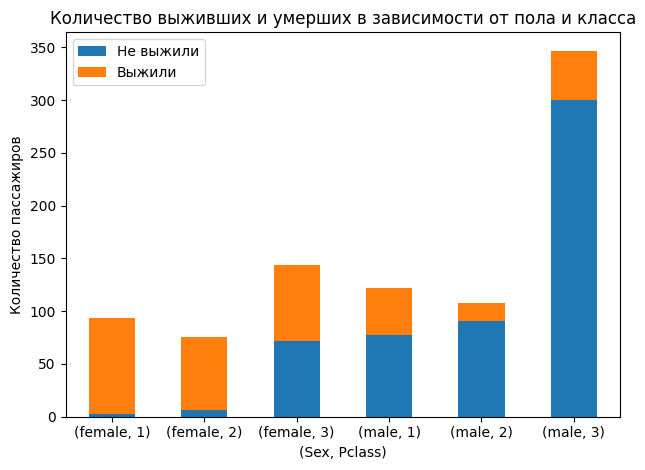

In [ ]:
surv_un.plot(
    kind='bar', # столбчатая диаграмма
    stacked=True # составные столбцы
)
plt.title('Количество выживших и умерших в зависимости от пола и класса')
plt.xlabel('(Sex, Pclass)')
plt.ylabel('Количество пассажиров')
plt.legend(['Не выжили', 'Выжили'])
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Видно, что в процентном соотношении выжило больше женщин чем мужчин. К тому же чаще выживали женщины, которые путешествовали первым и вторым классами

### Зависимость выживаемости пассажира в зависимости от того путешествовал он один или нет

In [ ]:
# Создаю новый признак, человек путешествует один или нет
df['IsAlone'] = np.where((df['SibSp'] == 0) & (df['Parch'] == 0), 1, 0)

In [ ]:
# Группирую данные по атрибутам IsAlone и Survived
is_alone_survived = df.groupby(['IsAlone', 'Survived']).size().unstack()
is_alone_survived

Survived,0,1
IsAlone,,
0,175,179
1,374,163


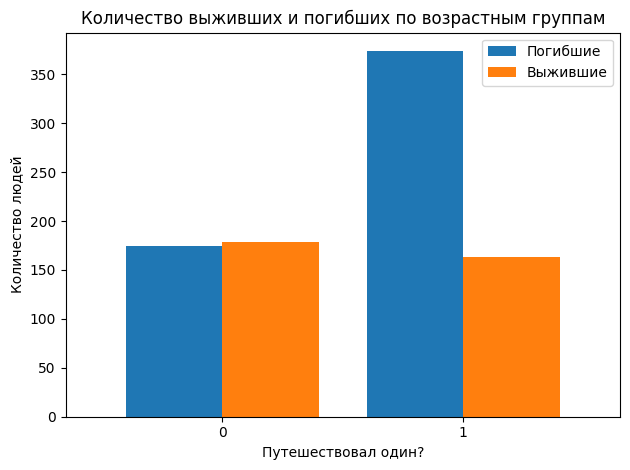

In [ ]:
is_alone_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8
)
plt.title('Количество выживших и погибших по возрастным группам')
plt.xlabel('Путешествовал один?')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout()
plt.show()

На диаграмме видно, что если человек путешествовал один, то на шансы на его выживание уменьшались более чем в 2 раза. Если пассажир путешествовал не один, то шанс на гибель и выживание были примерно одинаковы

### Количество выживших в процентах в зависимости от количества родственников на борту

In [ ]:
df_relatives = pd.DataFrame()
# Складываю значения столбцов и создаю новый столбец
df_relatives['Relatives'] = df['SibSp'] + df['Parch']
df_relatives['Survived'] = df['Survived']

In [ ]:
df_relatives

,Relatives,Survived
0,1,0
1,1,1
2,0,1
3,1,1
4,0,0
...,...,...
886,0,0
887,0,1
888,3,0
889,0,1


In [ ]:
# Группирую по количеству родственников на борту у пассажира и
# считаю сколько пассажиров выжило, а сколько погибло
df_relatives = df_relatives.groupby('Relatives')['Survived'].value_counts().unstack()

In [ ]:
df_relatives

Survived,0,1
Relatives,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,NaN
10,7.0,NaN


In [ ]:
df_relatives.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 0 to 10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       9 non-null      float64
 1   1       7 non-null      float64
dtypes: float64(2)
memory usage: 216.0 bytes


In [ ]:
# Избавляюсь от NaN и ставлю 0, тк не было сведений о выживших
df_relatives.fillna({1: 0}, inplace=True)

In [ ]:
df_relatives

Survived,0,1
Relatives,,
0,374.0,163.0
1,72.0,89.0
2,43.0,59.0
3,8.0,21.0
4,12.0,3.0
5,19.0,3.0
6,8.0,4.0
7,6.0,0.0
10,7.0,0.0


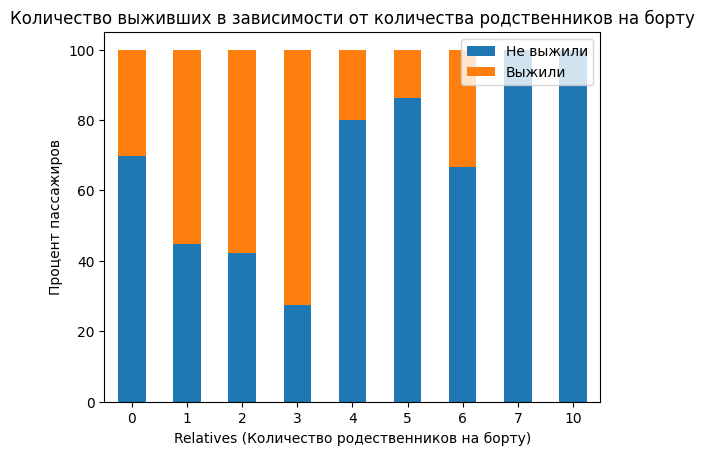

In [ ]:
# Считаю процент выживших и погибших
# div поэлементно делит значения в одном объекте на значения в другом
df_relatives_percent = df_relatives.div(df_relatives.sum(axis=1), axis=0) * 100

df_relatives_percent.plot(kind='bar', stacked=True)
plt.title('Количество выживших в зависимости от количества родственников на борту')
plt.xlabel('Relatives (Количество родественников на борту)')
plt.ylabel('Процент пассажиров')
plt.legend(['Не выжили', 'Выжили'])

# Поворот подписей для удобства чтения
plt.xticks(rotation=0)
plt.show()

Больший процент выживаемости у пассажиров, которые путешествовали с семьями, в которых от 2 до 4 человек (родственников на борту от 1 до 3)

### Количество выживших в зависимости от возраста

In [ ]:
import numpy as np
np.var(df['Sex'])

0.22821808306282707

In [ ]:
# Получаю максимальный возраст пассажира
maximum_age = int(max(df['Age']))
maximum_age

80

In [ ]:
# Создаю группы для разделения возрастов
bins = range(0, maximum_age + 1, 10)
# Создаю подписи для столбцов
labels = [f'({i}, {i + 10}]' for i in bins[:-1]]
labels

['(0, 10]',
 '(10, 20]',
 '(20, 30]',
 '(30, 40]',
 '(40, 50]',
 '(50, 60]',
 '(60, 70]',
 '(70, 80]']

In [ ]:
# cut - позволяет разбить данные столбца на группы
# right - включает правый край интервала в диапазон
df_initial['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=True)
age_survived = df_initial.groupby(['AgeGroup', 'Survived']).size().unstack()
age_survived

<ipython-input-755-958f87c1e53e>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_survived = df_initial.groupby(['AgeGroup', 'Survived']).size().unstack()


Survived,0,1
AgeGroup,,
"(0, 10]",26,38
"(10, 20]",71,44
"(20, 30]",271,136
"(30, 40]",86,69
"(40, 50]",53,33
"(50, 60]",25,17
"(60, 70]",13,4
"(70, 80]",4,1


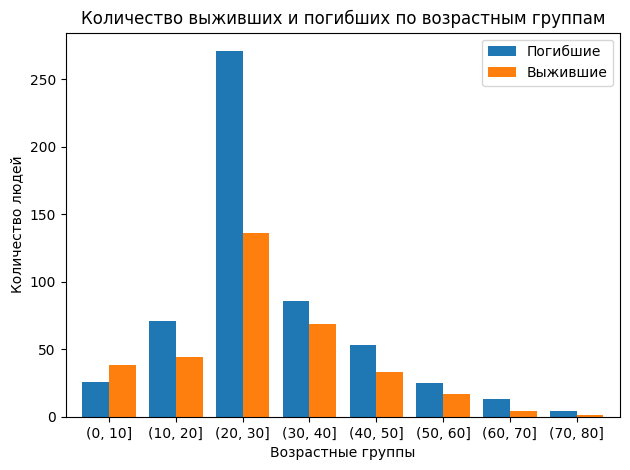

In [ ]:
age_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8 # Ширина столбца
)
plt.title('Количество выживших и погибших по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout() # Корректирует отступы между элементами на графике
plt.show()

На диаграмме видно, что большая часть пассажиров - это люди от 20 до 30 лет. Также видно, что в процентном соотношении больше всего погибло людей в возрасте от 20 до 30 лет, а выжило в возрасте от 0 до 10 лет.

### Зависимость выживания от порта посадки

In [ ]:
embarked_survived = df_initial.groupby(['Embarked', 'Survived']).size()
embarked_survived

Embarked  Survived
C         0            75
          1            93
Q         0            47
          1            30
S         0           427
          1           217
dtype: int64

In [ ]:
# Пустые значения заполняю самым частовстречающимся портом
embarked_survived = embarked_survived.unstack(fill_value='S')

In [ ]:
embarked_survived

Survived,0,1
Embarked,,
C,75,93
Q,47,30
S,427,217


In [ ]:
# Создаю атрибут Total и заполняю его значения суммой значений выживших и погибших,
# севших в определённом порту
embarked_survived['Total'] = embarked_survived.sum(axis=1)
# Сортирую по убыванию
embarked_survived = embarked_survived.sort_values(by='Total', ascending=False)
# Удаляю столбец Total
embarked_survived = embarked_survived.drop(columns='Total')
# Меняю символьное обозначение порта на полное название
embarked_survived = embarked_survived.rename(index={'S': 'Southampton', 'C': 'Cherbourg', 'Q': 'Queenstown'})
embarked_survived

Survived,0,1
Embarked,,
Southampton,427,217
Cherbourg,75,93
Queenstown,47,30


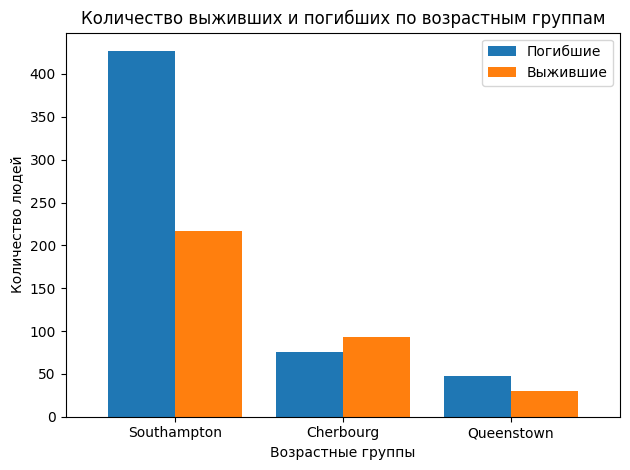

In [ ]:
embarked_survived.plot(
    kind='bar',
    stacked=False,
    width=0.8
)
plt.title('Количество выживших и погибших по возрастным группам')
plt.xlabel('Возрастные группы')
plt.ylabel('Количество людей')
plt.xticks(rotation=0)
plt.legend(['Погибшие', 'Выжившие'])
plt.tight_layout()
plt.show()

На диаграмме видно, что большая часть пассажиров села в порту Soutampton. Люди, севшие в порту Cherbourg, имели больше шансов на выживание

# Разбиение данных на тренировочный и тестовый наборы

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    int64  
 4   Sex          891 non-null    int64  
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    int64  
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    int64  
 11  Embarked     891 non-null    int64  
 12  IsAlone      891 non-null    int64  
dtypes: float64(2), int64(11)
memory usage: 90.6 KB


In [ ]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone
0,1,0,3,108,1,22.0,1,0,523,7.2500,147,2,0
1,2,1,1,190,0,38.0,1,0,596,71.2833,81,0,0
2,3,1,3,353,0,26.0,0,0,669,7.9250,147,2,1
3,4,1,1,272,0,35.0,1,0,49,53.1000,55,2,0
4,5,0,3,15,1,35.0,0,0,472,8.0500,147,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,548,1,27.0,0,0,101,13.0000,147,2,1
887,888,1,1,303,0,19.0,0,0,14,30.0000,30,2,1
888,889,0,3,413,0,28.0,1,2,675,23.4500,147,2,0
889,890,1,1,81,1,26.0,0,0,8,30.0000,60,0,1


In [ ]:
df['Relatives'] = df['SibSp'] + df['Parch']
df['Relatives']

,Relatives
0,1
1,1
2,0
3,1
4,0
...,...
886,0
887,0
888,3
889,0


In [ ]:
X = df.drop(columns=['Survived', 'Name', 'Fare', 'Ticket', 'PassengerId'])
# X = df.drop(columns=['Survived', 'Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch'])
y = df['Survived']

In [ ]:
df['Age'].unique()

array([22.  , 38.  , 26.  , 35.  , 28.  , 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  ,  8.  ,
       19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  , 49.  ,
       29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  , 16.  ,
       25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  , 71.  ,
       37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 , 51.  ,
       55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  , 45.5 ,
       20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  , 60.  ,
       10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  , 70.  ,
       24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [ ]:
X

,Pclass,Sex,Age,SibSp,Parch,Cabin,Embarked,IsAlone,Relatives
0,3,1,22.0,1,0,147,2,0,1
1,1,0,38.0,1,0,81,0,0,1
2,3,0,26.0,0,0,147,2,1,0
3,1,0,35.0,1,0,55,2,0,1
4,3,1,35.0,0,0,147,2,1,0
...,...,...,...,...,...,...,...,...,...
886,2,1,27.0,0,0,147,2,1,0
887,1,0,19.0,0,0,30,2,1,0
888,3,0,28.0,1,2,147,2,0,3
889,1,1,26.0,0,0,60,0,1,0


In [ ]:
X.shape

(891, 9)

In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
df['Survived'].value_counts()

,count
Survived,
0,549
1,342


Modeling

In [ ]:
df.corr()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,IsAlone,Relatives
PassengerId,1.000000,-0.005007,-0.035144,-0.038559,0.042939,0.034212,-0.057527,-0.001652,-0.056554,0.012658,-0.035077,0.013083,0.057462,-0.040143
Survived,-0.005007,1.000000,-0.338481,-0.057343,-0.543351,-0.064910,-0.035322,0.081629,-0.164549,0.257307,-0.254888,-0.163517,-0.203367,0.016639
Pclass,-0.035144,-0.338481,1.000000,0.052831,0.131900,-0.339898,0.083081,0.018443,0.319869,-0.549500,0.684121,0.157112,0.135207,0.065997
Name,-0.038559,-0.057343,0.052831,1.000000,0.020314,0.048252,-0.017230,-0.049105,0.047348,-0.049173,0.061959,-0.004557,0.070722,-0.036309
Sex,0.042939,-0.543351,0.131900,0.020314,1.000000,0.081163,-0.114631,-0.245489,0.059372,-0.182333,0.096681,0.104057,0.303646,-0.200988
Age,0.034212,-0.064910,-0.339898,0.048252,0.081163,1.000000,-0.233296,-0.172482,-0.070382,0.096688,-0.240839,-0.014205,0.171647,-0.245619
SibSp,-0.057527,-0.035322,0.083081,-0.017230,-0.114631,-0.233296,1.000000,0.414838,0.079461,0.159651,0.043593,0.066654,-0.584471,0.890712
Parch,-0.001652,0.081629,0.018443,-0.049105,-0.245489,-0.172482,0.414838,1.000000,0.020003,0.216225,-0.028324,0.038322,-0.583398,0.783111
Ticket,-0.056554,-0.164549,0.319869,0.047348,0.059372,-0.070382,0.079461,0.020003,1.000000,-0.013885,0.243696,-0.006041,0.028314,0.064302
Fare,0.012658,0.257307,-0.549500,-0.049173,-0.182333,0.096688,0.159651,0.216225,-0.013885,1.000000,-0.503355,-0.221226,-0.271832,0.217138


# Обучение

## Модель 1

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model = Sequential()
model.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(9, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.6504 - loss: 0.6845 - val_accuracy: 0.6783 - val_loss: 0.6450
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6422 - loss: 0.6687 - val_accuracy: 0.7133 - val_loss: 0.6205
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6938 - loss: 0.6319 - val_accuracy: 0.7133 - val_loss: 0.5997
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6654 - loss: 0.6212 - val_accuracy: 0.7133 - val_loss: 0.5802
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6862 - loss: 0.5827 - val_accuracy: 0.7343 - val_loss: 0.5609
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7151 - loss: 0.5769 - val_accuracy: 0.7343 - val_loss: 0.5459
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7226 - loss: 0.5476 - val_accuracy: 0.7413 - val_loss: 0.5323
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7180 - loss: 0.5362 - val_accuracy: 0.7483 - val_loss

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8359 - loss: 0.4188 
Test Accuracy: 0.82


In [ ]:
import joblib
joblib.dump(model, f'{BASE_URL}models/fully-connected-model.pkl')

['/content/drive/MyDrive/titanic/models/fully-connected-model.pkl']

In [ ]:
model_loaded = joblib.load(f'{BASE_URL}models/fully-connected-model.pkl')

In [ ]:
y_test.head(5)

,Survived
709,1
439,0
840,0
720,1
39,1


In [ ]:
model_loaded.predict(X_test[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step


array([[0.04944958],
       [0.13773134],
       [0.13734709],
       [0.8727433 ],
       [0.75411975]], dtype=float32)

### Результаты обучения

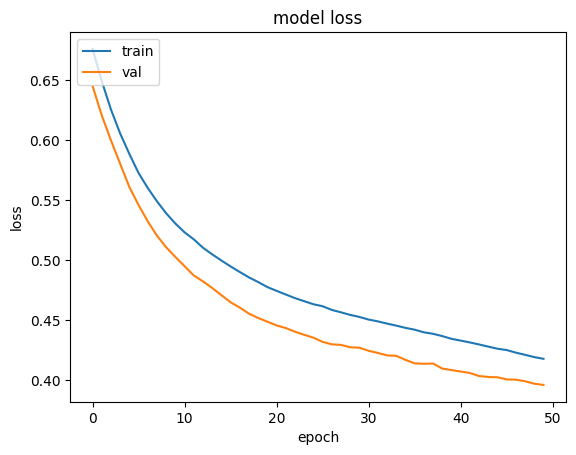

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

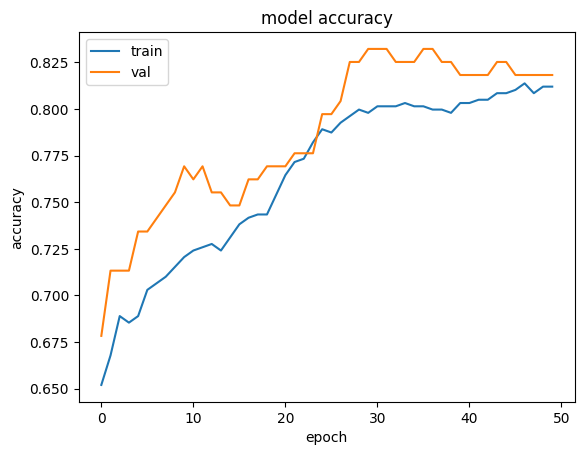

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8359 - loss: 0.4188 
Test Accuracy: 0.82


## Модель 2

In [ ]:
# Standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model2 = Sequential()
model2.add(Dense(6, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(9, activation='relu'))
model2.add(Dense(9, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

# Compile the model
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Train the model
history2 = model2.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.7028 - loss: 0.5639 - val_accuracy: 0.7203 - val_loss: 0.5407
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6913 - loss: 0.5869 - val_accuracy: 0.7273 - val_loss: 0.5314
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7468 - loss: 0.5619 - val_accuracy: 0.7343 - val_loss: 0.5210
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7147 - loss: 0.5729 - val_accuracy: 0.7273 - val_loss: 0.5129
Epoch 5/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7271 - loss: 0.5696 - val_accuracy: 0.7203 - val_loss: 0.5040
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7580 - loss: 0.5435 - val_accuracy: 0.7343 - val_loss: 0.4956
Epoch 7/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7932 - loss: 0.5130 - val_accuracy: 0.7413 - val_loss: 0.4866
Epoch 8/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7837 - loss: 0.5110 - val_accuracy: 0.7622 - val_loss

In [ ]:
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8184 - loss: 0.4331 
Test Accuracy: 0.80


In [ ]:
joblib.dump(model2, f'{BASE_URL}models/model2.pkl')

['/content/drive/MyDrive/titanic/models/model2.pkl']

### Результаты обучения

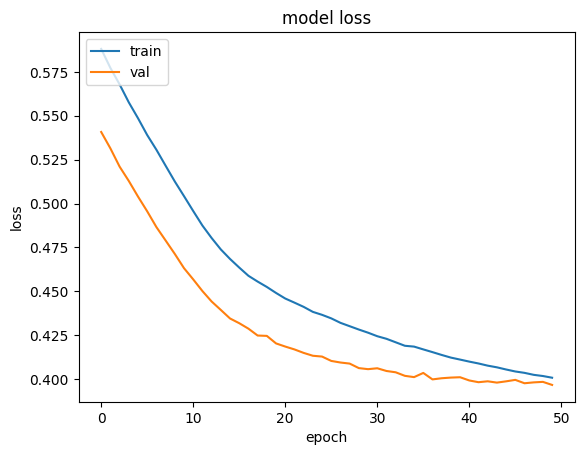

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

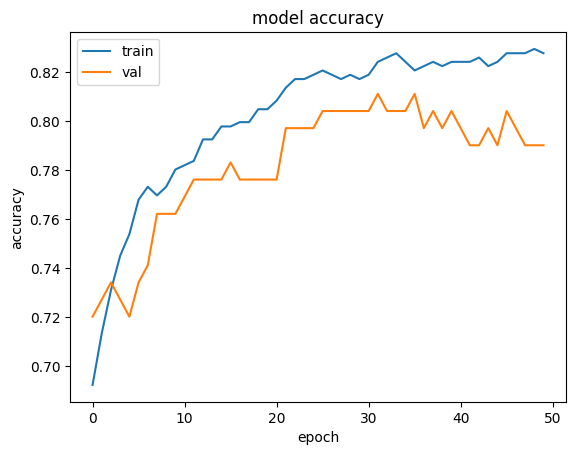

In [ ]:
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model2.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8184 - loss: 0.4331 
Test Accuracy: 0.80


## Модель 3

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create the neural network model
model3 = Sequential()
model3.add(Dense(32, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dropout(0.4))
model3.add(Dense(64, activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(32, activation='relu'))
model3.add(Dropout(0.3))
model3.add(Dense(16, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

# Compile the model
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

In [ ]:
# Train the model
history3 = model3.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    # callbacks=[early_stopping]
)

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.3662 - loss: 0.7598 - val_accuracy: 0.6503 - val_loss: 0.6861
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4631 - loss: 0.7004 - val_accuracy: 0.7832 - val_loss: 0.6761
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6074 - loss: 0.6921 - val_accuracy: 0.7622 - val_loss: 0.6687
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6524 - loss: 0.6769 - val_accuracy: 0.7692 - val_loss: 0.6570
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6919 - loss: 0.6568 - val_accuracy: 0.7762 - val_loss: 0.6375
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6990 - loss: 0.6520 - val_accuracy: 0.8042 - val_loss: 0.6093
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7061 - loss: 0.6257 - val_accuracy: 0.8252 - val_loss: 0.5715
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7210 - loss: 0.5955 - val_accuracy: 0.8182 - 

In [ ]:
loss, accuracy = model3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8338 - loss: 0.4181 
Test Accuracy: 0.83


In [ ]:
joblib.dump(model3, f'{BASE_URL}models/model3.pkl')

['/content/drive/MyDrive/titanic/models/model3.pkl']

### Результаты обучения

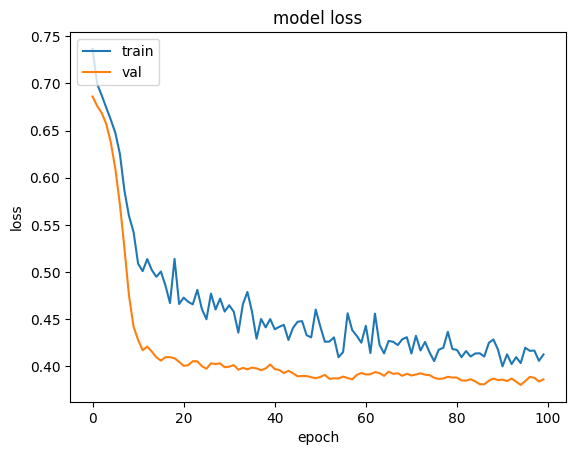

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

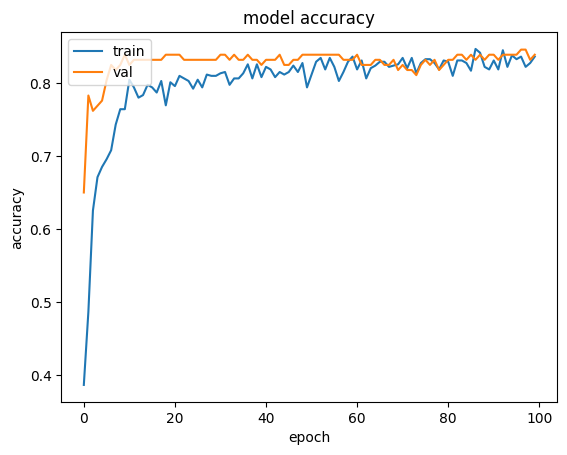

In [ ]:
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
# Evaluate the model
loss, accuracy = model3.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy:.2f}')

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8338 - loss: 0.4181 
Test Accuracy: 0.83


# Сохранение датасета, на котором обучалась модель

In [ ]:
# dff_Xy['Survived'] = y.cop_Xy = X.copy(deep=True)
# dy(deep=True)

In [ ]:
# df_Xy

In [ ]:
# df_Xy.to_csv(f'{BASE_URL}titanic_for_train.csv', sep=';')